**INSTAGRAM: DETECCIÓN DE USUARIOS FALSOS**

Instagram es una de las redes sociales mas utilizadas en el mundo. Diariamente se crean miles de cuentas por parte de usuarios nuevos, pero también entre ellos personas que quieren suplantar la identidad de otra.
Al tener un uso tan masivo, es cada vez mas comùn encontrar estafas o actividades maliciosas por parte de ciertos usuarios que no muestran su verdadera identidad, y que se suman a la red social con el único objetivo de realizar ilícitos.

dirigiendo a otros sitios cuentas falsas,

A partir de un conjunto de datos tomados de los perfiles de usuarios de Instagram se intentará predecir cuales de ellos son **reales** y cuales son **falsos**, utilizados como Bots o Spam.

https://www.kaggle.com/krpurba/fakeauthentic-user-instagram

imagen

## DESCRIPCIÓN DE LAS VARIABLES

<table>
    <tr>
        <td><strong>Variable</strong></td>
        <td><strong>Definicion</strong></td>
        <td><strong>Es utilizada?</strong></td>
        <td><strong>Entrada/Salida</strong></td>        
        <td><strong>Valor</strong></td>
    </tr>
    <tr>
        <td>pos</td>
        <td>Cantidad de publicaciones totales</td>
        <td>Si</td>
        <td>Entrada</td>
        <td></td>
    </tr>
    <tr>
        <td>flw</td>
        <td>Cantidad de seguidos.</td>
        <td>Si</td>
        <td>Entrada</td>
        <td></td>
    </tr>
    <tr>
        <td>flg</td>
        <td>Cantidad de seguidores</td>
        <td>Si</td>
        <td>Entrada</td>
        <td></td>
    </tr>
    <tr>
        <td>bl</td>
        <td>Cantidad de caracteres de la biografía</td>
        <td>Si</td>
        <td>Entrada</td>
        <td></td>
    </tr>
    <tr>
        <td>pic</td>
        <td>Contiene imagen de perfil.</td>
        <td>Si</td>
        <td>Entrada</td>
        <td>0 = NO tiene / 1 = Tiene</td>
    </tr>
    <tr>
        <td>lin</td>
        <td>Contiene URL externa</td>
        <td>Si</td>
        <td>Entrada</td>
        <td>0 = NO tiene / 1 = Tiene</td>
    </tr>
    <tr>
        <td>cl</td>
        <td>Número medio de caracteres de longitud de las publicaciones</td>
        <td>Si</td>
        <td>Entrada</td>
        <td></td>
    </tr>
    <tr>
        <td>cz</td>
        <td>Porcentaje de publicaciones con cantidad de caracteres casi nula</td>
        <td>Si</td>
        <td>Entrada</td>
        <td></td>
    </tr>
    <tr>
        <td>ni</td>
        <td>Porcentaje de publicaciones sin imagenes.</td>
        <td>Si</td>
        <td>Entrada</td>
        <td></td>
    </tr>
    <tr>
        <td>erl</td>
        <td>Tasa de participación (Me Gusta). Cantidad MG / Cantidad publicaciones / Nro seguidores</td>
        <td>No</td>
        <td>-</td>
        <td></td>
    </tr>
    <tr>
        <td>erc</td>
        <td>Tasa de participación (Comentarios). Cantidad Comentarios / Cantidad publicaciones / Nro seguidores </td>
        <td>No</td>
        <td>-</td>
        <td></td>
    </tr>
    <tr>
        <td>lt</td>
        <td>Porcentaje de publicaciones con ubicación</td>
        <td>Si</td>
        <td>Entrada</td>
        <td></td>
    </tr>
    <tr>
        <td>hc</td>
        <td>Número medio de hashtags utilizados en una publicación</td>
        <td>Si</td>
        <td>Entrada</td>
        <td></td>
    </tr>
    <tr>
        <td>pr</td>
        <td>Uso promedio de palabras clave promocionales en hashtags (ej: regrann, contest, repost, giveaway, mention, share, give away, quiz)</td>
        <td>Si</td>
        <td>Entrada</td>
    <tr>
        <td>fo</td>
        <td>Uso promedio de palabras claves de interacción en hashtags (ej: follow, like, follback)</td>
        <td>Si</td>
        <td>Entrada</td>
        <td></td>
    </tr>
    <tr>
        <td>cs</td>
        <td>Similitud de coseno promedio de entre todos los pares de dos publicaciones que tiene un usuario</td>
        <td>No</td>
        <td>-</td>
        <td></td>
    </tr>
    <tr>
        <td>pi</td>
        <td>Intervalo medio entre publicaciones (en horas)</td>
        <td>Si</td>
        <td>Entrada</td>
        <td></td>
    </tr>
    <tr>
        <td>class</td>
        <td>Clase de Usuario</td>
        <td>Si</td>
        <td>Salida</td>
        <td>f = fake / r =real</td>
    </tr>
</table>

Las columnas **erl, erc** y **cs** no serán utilizadas ya que corresponden a cálculos realizados por el dueño del dataset y que al no tener los datos de las variables de la ecuacion no tenemos forma de corroborar que los calculos sean correctos.
Ej: erl --> Tasa de participación (Me Gusta). Cantidad MG / Cantidad publicaciones / Nro seguidores

No tenemos la cantidad de MG para corroborar que el cálculo sea veridico.

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
dataset_original = pd.read_csv('instagram.csv')

renamed_columns = {'pos':'post','flw':'followers','flg':'following','bl':'biography_lenght','pic':'profile_picture','lin':'external_url','cl':'post_lenght','cz':'post_lenght_null','ni':'none_image','erl':'erl','erc':'erc','lt':'post_location','hc':'hashtags_post','pr':'hashtags_promotional','fo':'hashtags_followers','cs':'cs','pi':'interval_post','class':'clase'}

dataset_original.rename(columns = renamed_columns, inplace = True)

dataset = dataset_original

# Eliminar las columnas que no usamos
del dataset['erl']
del dataset['erc']
del dataset['cs']



## DESCRIPCIÓN GENERAL DE LOS DATOS

In [8]:
# Dimensiones del dataset
dataset.shape

(65326, 15)

In [22]:
# Ejemplos del dataset
dataset.sample(10)

,post,followers,following,biography_lenght,profile_picture,external_url,post_lenght,post_lenght_null,none_image,post_location,hashtags_post,hashtags_promotional,hashtags_followers,interval_post,class
62754,162,599,700,21,1,0,555,0.000000,0.889,0.000,0.000,0.0,0.0,447.553619,r
9632,243,1100,7100,141,1,0,0,1.000000,0.222,0.000,0.000,0.0,0.0,19.170000,f
48709,1,170,307,32,1,0,11,0.000000,0.000,0.000,0.000,0.0,0.0,0.000000,r
48282,165,480,646,150,1,0,131,0.000000,0.000,0.056,0.278,0.0,0.0,1013.794250,r
13142,9,57,533,0,1,0,0,1.000000,0.000,0.000,0.000,0.0,0.0,0.005926,f
5009,138,611,4600,104,1,1,132,0.111111,0.556,0.389,0.667,0.0,0.0,710.064087,f
31376,87,1300,7100,0,1,0,213,0.000000,0.000,0.167,3.667,0.0,0.0,253.885666,f
34289,206,400,536,172,1,1,229,0.000000,0.333,0.778,1.389,0.0,0.0,534.073791,r
23761,1,104,7400,126,1,0,0,1.000000,0.000,0.000,0.000,0.0,0.0,0.000000,f
11795,14,373,2200,0,1,0,28,0.142857,0.357,0.071,0.000,0.0,0.0,449.718842,f


In [23]:
# Datos estadisticos
dataset.describe()

,post,followers,following,biography_lenght,profile_picture,external_url,post_lenght,post_lenght_null,none_image,post_location,hashtags_post,hashtags_promotional,hashtags_followers,interval_post
count,65326.000000,6.532600e+04,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000
mean,176.571227,1.183077e+03,2310.519211,57.497061,0.951765,0.281925,136.520344,0.250012,0.193229,0.208877,0.507796,0.032745,0.052837,496.475193
std,723.470655,2.170802e+04,2592.096104,64.129260,0.214264,0.449940,215.714486,0.337891,0.252939,0.300362,1.156921,0.220987,0.519058,944.905389
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.230000e+02,394.000000,0.000000,1.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.571458
50%,30.000000,3.380000e+02,995.000000,32.000000,1.000000,0.000000,46.000000,0.055556,0.059000,0.000000,0.077000,0.000000,0.000000,183.227943
75%,124.000000,8.170000e+02,3600.000000,110.000000,1.000000,1.000000,170.000000,0.444444,0.333000,0.333000,0.611000,0.000000,0.000000,580.771927
max,76200.000000,3.900000e+06,8800.000000,555.000000,1.000000,1.000000,3644.000000,1.000000,1.000000,1.000000,30.000000,20.000000,58.000000,26786.134766


In [24]:
# Datos nulos por columna
dataset.isnull().sum()

post                    0
followers               0
following               0
biography_lenght        0
profile_picture         0
external_url            0
post_lenght             0
post_lenght_null        0
none_image              0
post_location           0
hashtags_post           0
hashtags_promotional    0
hashtags_followers      0
interval_post           0
class                   0
dtype: int64

# Descripcion de la variable de salida

<AxesSubplot:ylabel='clase'>

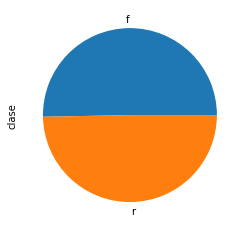

In [31]:
# Datos balanceados

dataset.clase.value_counts().sort_index().plot.pie()


Tal como describe el gráfico anterior, los datos se encuentran balanceados ya que dentro del dataset existe la misma cantidad de usuarios reales y falsos. Al estar balanceados los datos no tendremos consecuencias a la hora de entrenar los modelos.

# Descripcion de 5 variables de entrada que afectan a la variable de salida

<AxesSubplot:>

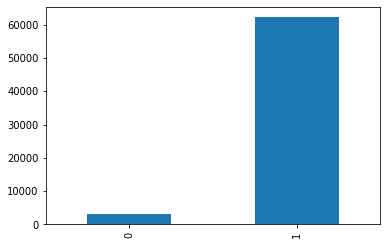

In [34]:
# Cantidad de cuentas que tienen o no foto de perfil
dataset.profile_picture.value_counts().sort_index().plot.bar()

agrupar por clase,
falsos que tienen foto
falsos que no tienen foto
reales que tienen foto
reales que no tienen foto

<AxesSubplot:>

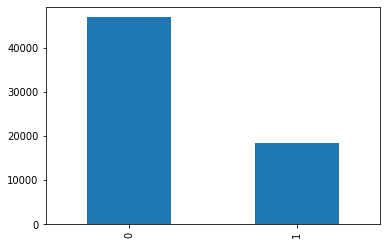

In [35]:
# Cantidad de cuentas que tienen o no URL externa
dataset.external_url.value_counts().sort_index().plot.bar()

agrupar por clase,
falsos que tienen url
falsos que no tienen url
reales que tienen url
reales que no tienen url

In [ ]:
# Cantidad de publicaciones con ubicacion

In [ ]:
agrupar por clase,
falsos que tienen ubicacion
falsos que no tienen ubicacion
reales que tienen ubicacion
reales que no tienen ubicacion

In [ ]:
# Cantidad de publicaciones con hashtag promocionales

In [ ]:
agrupar por clase,
falsos que tienen hashtag
falsos que no tienen hashtag
reales que tienen hashtag
reales que no tienen hashtag

In [ ]:
# Cantidad de publicaciones en horas

In [ ]:
agrupar por clase,
falsos que tienen horas
falsos que no tienen horas
reales que tienen horas
reales que no tienen horas

## Correlaciones entre variables